In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [2]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [3]:
#기본적인 오토인코더에서 인코더 및 디코더를 더 깊은 층으로 구성한다.
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [4]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2462 - val_loss: 0.1671
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1497 - val_loss: 0.1365
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1306 - val_loss: 0.1236
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1214 - val_loss: 0.1167
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1158 - val_loss: 0.1123
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1122 - val_loss: 0.1097
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1096 - val_loss: 0.1069
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1071 - val_loss: 0.1050
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1048 - val_loss: 0.1028
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1028 - val_lo

235/235 [==============================] - 1s 4ms/step - loss: 0.0813 - val_loss: 0.0810
Epoch 82/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0813 - val_loss: 0.0811
Epoch 83/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0812 - val_loss: 0.0810
Epoch 84/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0812 - val_loss: 0.0810
Epoch 85/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0811 - val_loss: 0.0809
Epoch 86/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0810 - val_loss: 0.0809
Epoch 87/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0810 - val_loss: 0.0809
Epoch 88/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0810 - val_loss: 0.0810
Epoch 89/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0810 - val_loss: 0.0807
Epoch 90/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0809 - val_loss: 

In [5]:
#오토인코더의 아웃풋을 변수에 저장
decoded_imgs = autoencoder.predict(x_test)

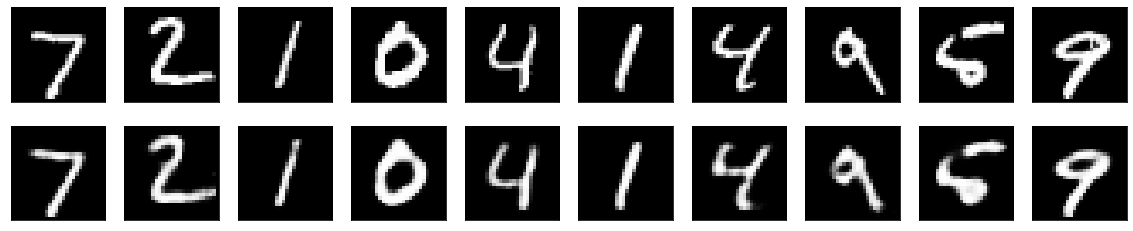

In [6]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()